### Численные методы ЛР3 (решение СЛАУ прямыми методами), задача 3.1. 

### Якименко Александра (32 в списке группы). Выполняемые задачи, согласно приложению 3А: 3.1.2.


## Задача 3.1. (вариант 2)
Дана система уравнений $Ax=b$ порядка $n$. Исследовать зависимость погрешности решения $x$ от погрешностей  правой части системы $b$.   
          
#### ПОРЯДОК  РЕШЕНИЯ  ЗАДАЧИ:
* Задать матрицу системы $A$ и вектор правой части $b$. Составить программу, реализующую метод Гаусса (схема частичного выбора) для произвольной системы $Ax=b$. Используя составленную программу, найти решение заданной системы $Ax=b$. Используя встроенную функцию, найти решение $x$ системы $Ax=b$ с помощью метода Гаусса.

* С помощью встроенной функции вычислить число обусловленности матрицы  $A$.

* Принимая решение $x$, полученное в п. 1, за точное, вычислить вектор $d=(d_1,\dots,d_n)^T$, $d_i=\frac{||x-x^i||_\infty}{||x||_\infty}$, $i=1,\dots,n$, относительных погрешностей решений $x^i$ систем $Ax^i=b^i$, $i=1,\dots,n$, где  компоненты векторов $b^i$ вычисляются по формулам: $ b_k^i=
    \begin{cases} 
      b_k+\Delta, \ k=i \\
      b_k, \ k\neq i 
   \end{cases}
$, $k=1,\dots,n; \ \ (\Delta$ - произвольная величина погрешности).

*  На основе вычисленного вектора $d$ построить гистограмму. По гистограмме определить компоненту $b_m$ вектора $b$, которая оказывает наибольшее влияние на погрешность решения. 

* Оценить теоретически погрешность решения $x^m$ по  формуле: $\delta(x^m)\leq cond(A)\cdot\delta(b^m)$. Сравнить значение $\delta(x^m)$ со значением практической погрешности $d_m$. Объяснить полученные результаты.

УКАЗАНИЕ. Функция $condi(A)$ возвращает число обусловленности матрицы $A$, основанное на $\infty$-норме. Для вычисления удобно воспользоваться встроенной функцией, возвращающей максимальную компоненту вектора $v$.


## 1.Решение системы методом Гаусса и встроенным методом.

Задать матрицу системы $A$ и вектор правой части $b$. Составить программу, реализующую метод Гаусса (схема частичного выбора) для произвольной системы $Ax=b$. Используя составленную программу, найти решение заданной системы $Ax=b$. Используя встроенную функцию, найти решение $x$ системы $Ax=b$ с помощью метода Гаусса.

$b_i = N, \ \ \forall i = 1 \dots n$

$n = 6, \ \ a_{ij}\frac{125}{(4+c 0.25)^6}$

где $c = c_{ij} = 0.1\cdot N\cdot i\cdot j, \ \ \forall i,j = 1 \dots n, \ \ N = 2$- номер варианта

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

N = 2
n = 6
b = np.empty([n, 1], dtype=int)
b.fill(N)
#c = np.arange(1,37).reshape(n,n)
c = np.fromfunction(lambda i, j: 0.1*(i+1)*(j+1)*N, (n, n), dtype=int)
A = 125/(4 + 0.25*c)**6

### Алгоритм

Дана матрица n x m.
Необходимо с помощью следующих операций:
Поменять местами две строки
Прибавить к одной строке другую строку, умноженную на некоторое число
получить матрицу, у которой левая нижняя часть относительно главной диагонали нулевая. Затем последовательно выразить неизвестные. 

#### Прямой ход
Поставим на место первой строки такую строку матрицы, у которой первый элемент максимальный. Вычтем из всех остальных строк матрицы первую строку так, чтобы их первые элементы занулились. Решим эту же задачу для подматрицы $[2\dots n][2 \dots m]$, потом для подматрицы $[3\dots n][3\dots m]$ и так далее. В результате получим искомую матрицу.

#### Обратный ход
Затем включаем обратный ход, последовательно выражаем $x_n \dots x_1$. В общем виде можно записать:

$x_m = \frac{b^{m-1}_m}{a^{m-1}_{mm}}$

$x_k = \frac{b^{k-1}_k - a^{k-1}_{k,k+1}x_{k+1} - a^{k-1}_{km}x_m}{a^{k-1}_{kk}}$

In [2]:
def gauss(A, b):
    #приводим расширенную матрицу к ступенчатому виду
    A_full = np.hstack((A, b))
    n = A_full.shape[0]
    for i in range(n): 
        #находим строку с максимальным первым элементом
        iMax = np.argmax(A[:,i:], axis=0)[0] + i
        #если строка с максимальным элементом не на первом месте меняем
        if(iMax != i):
            A_full[i], A_full[iMax] = A_full[iMax], A_full[i]
        for j in range(i+1, n):
            #из всех строк вычитаем отношение первых элементов умноженные на эту строку
            A_full[j] -= A_full[j][i]/A_full[i][i]*A_full[i]
    #теперь обратный ход, последовательно выражаем x_n ... x_1
    x = np.empty_like(b, dtype = float)
    for m in range(n-1, -1, -1):#начиная с конца
        
        x[m] = A_full[m, n:]/A_full[m][m]
        #A_full[:m, A_full.shape[0]:] -= np.array([A_full[:m, m] * x[m]]).T
        A_full[:m, n:] -= np.array([A_full[:m, m]]).T * x[m]
    return x

#x[m] = (A_full[:m, A_full.shape[0]:] - np.array([A_full[:m, m] * A_full[m-1][A_full.shape[0]]/A_full[m-1][m-1]]).T)/A_full[m][m]

In [1]:
#A_full = np.hstack((A, bk))
#A_full[2][5:]

In [3]:
x = gauss(A, b)
print('решение методом Гаусса:x =\n', x)
print('\nрешение встроенной функцией:x =\n', np.linalg.solve(A, b))

решение методом Гаусса:x =
 [[  634.55255727]
 [-2489.26761742]
 [ 5081.29044251]
 [-5708.30702865]
 [ 3353.92805958]
 [ -806.77186169]]

решение встроенной функцией:x =
 [[  634.55255726]
 [-2489.26761731]
 [ 5081.29044218]
 [-5708.30702818]
 [ 3353.92805925]
 [ -806.7718616 ]]


## 2.Поиск числа обусловленности матрицы А.

С помощью встроенной функции вычислить число обусловленности матрицы  $A$.

In [4]:
cond_1_A = np.linalg.cond(A, 1)
cond_inf_A = np.linalg.cond(A, np.inf)
print("число обусловленности матрицы А с использованием 1-нормы:", cond_1_A)
print("число обусловленности матрицы А с использованием inf-нормы:", cond_inf_A)

число обусловленности матрицы А с использованием 1-нормы: 16644654.2618
число обусловленности матрицы А с использованием inf-нормы: 16644654.2618


## 3.Вычисление относительных погрешностей.

3. Принимая решение $x$, полученное в п. 1, за точное, вычислить вектор $d=(d_1,\dots,d_n)^T$, $d_i=\frac{||x-x^i||_\infty}{||x||_\infty}$, $i=1,\dots,n$, относительных погрешностей решений $x^i$ систем $Ax^i=b^i$, $i=1,\dots,n$, где  компоненты векторов $b^i$ вычисляются по формулам: $ b_k^i=
    \begin{cases} 
      b_k+\Delta, \ k=i \\
      b_k, \ k\neq i 
   \end{cases}
$, $k=1,\dots,n; \ \ (\Delta$ - произвольная величина погрешности).

In [5]:
delta = 0.1
bk = b + np.eye(n)*delta
xk = gauss(A, bk)
d = np.linalg.norm(x-xk, np.inf, axis=0)/np.linalg.norm(x, np.inf, axis=0)
#dk = abs(xk-x).max(axis = 0)/abs(x).max(axis = 0)
print('относительные погрешности d = ', d)

относительные погрешности d =  [  22.82280272  170.61174325  498.09451965  711.99174872  499.52722221
  137.89105261]


## 4. Построение гистограммы.

На основе вычисленного вектора $d$ построить гистограмму. По гистограмме определить компоненту $b_m$ вектора $b$, которая оказывает наибольшее влияние на погрешность решения.

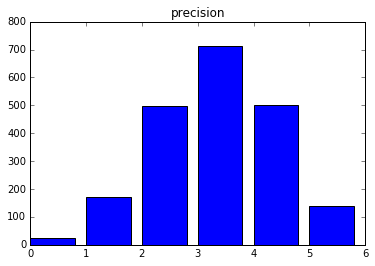

In [6]:
plt.bar(np.arange(d.shape[0]), d)
plt.title("precision")
plt.show()

#### b4 оказывает наибольшее влияние на погрешность решения

## 5.Теоретическая оценка погрешности.

Оценить теоретически погрешность решения $x^m$ по  формуле: $\delta(x^m)\leq cond(A)\cdot\delta(b^m)$. Сравнить значение $\delta(x^m)$ со значением практической погрешности $d_m$. Объяснить полученные результаты.

In [17]:
delta_b = np.zeros(b.shape[0])
for i in range(b.shape[0]):
    delta_b[i] = np.linalg.norm(b-np.array([bk[i]]).T, np.inf, axis=0)/np.linalg.norm(b, np.inf, axis=0)

In [18]:
delta_x = cond_1_A * delta_b

In [19]:
print(delta_x)

[ 832232.71308994  832232.71308994  832232.71308994  832232.71308994
  832232.71308994  832232.71308994]


### Вывод
Практическая погрешность меньше максимальной теоретической так как число обусловленностей велико

### Черновик

def gauss1(A, b):
    #приводим расширенную матрицу к ступенчатому виду
    A_full = np.hstack((A, b))
    n = A_full.shape[0]
    for i in range(n): 
        #находим строку с максимальным первым элементом
        iMax = np.argmax(A[:,i:], axis=0)[0] + i
        #если строка с максимальным элементом не на первом месте меняем
        if(iMax != i):
            A_full[i], A_full[iMax] = A_full[iMax], A_full[i]
        for j in range(i+1, n):
            #из всех последующих строк вычитаем отношение первых элементов умноженные на эту строку
            A_full[j] -= A_full[j][i]/A_full[i][i]*A_full[i]
    #теперь обратный ход, последовательно выражаем x_n ... x_1
    x = np.empty_like(b, dtype = float)
    for m in range(n-1, -1, -1):#начиная с конца до нуля
        
        x[m] = A_full[m][n]/A_full[m][m]
        A_full[:m, n:] -= np.array([A_full[:m, m]]).T * x[m]
    return x

bk1 = b + np.eye(n)*delta
#xk1 = np.zeros(bk1.shape[0])
xk1 = np.empty_like(bk1, dtype = float)
for i in range(bk1.shape[0]):
    xk1[i] = gauss1(A, np.array([bk1[i]]).T).ravel()
d1 = np.linalg.norm(x-xk1, np.inf, axis=0)/np.linalg.norm(x, np.inf, axis=0)
#dk = abs(xk-x).max(axis = 0)/abs(x).max(axis = 0)
print('относительные погрешности d = ', d1)

x = gauss1(A, b)
print('решение методом Гаусса:x =\n', x)
print('\nрешение встроенной функцией:x =\n', np.linalg.solve(A, b))

In [68]:
#(A2[:1, A2.shape[0]:]-np.array([A2[:1, 1] * A2[1][A2.shape[0]]/A2[1][1]]).T)/A2[1][1]